In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_iris

# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold    # train, test 데이터 분할
# from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score

train score : 0.9642857142857143
test score : 0.9473684210526315
test pred :  [0 1 0 1 0 1 2 1 2 0 1 2 0 2 0 1 0 0 2 1 1 0 2 0 2 1 2 1 0 2 1 2 2 0 1 1 0
 1]
test target [0 1 0 1 0 1 2 1 2 0 1 2 0 2 0 1 0 0 2 1 1 0 2 0 2 1 2 1 0 2 1 2 2 0 2 1 0
 2]


[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.25, 0.375, 'x[1] <= 2.65\nentropy = 0.384\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.125, 0.125, 'entropy = 0.75\nsamples = 14\nvalue = [0, 11, 3]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.75, 0.375, 'x[2] <= 4.95\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

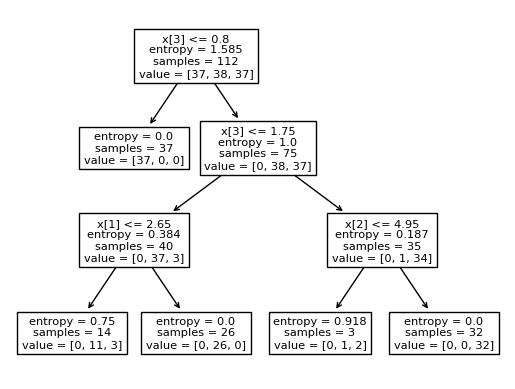

In [122]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=120)

m = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)  # default : "gini"

m.fit(X_train, y_train)

print('train score :', m.score(X_train, y_train))
print('test score :', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

# train score > test score : 과적합 의심

plot_tree(m)

In [125]:
from sklearn.model_selection import KFold

m = KFold(n_splits=3)

# X, y = load_iris(return_X_y=True)

for train, test in m.split(X) :
  # print("-----------------------")
  # print("train", train)
  # print(X[train], y[train])
  # print("test", test)
  # print(X[test], y[test])
  d = DecisionTreeClassifier()

  d.fit(X[train], y[train])

  print('Train score ', d.score(X[train], y[train]))
  print('Test score ', d.score(X[test], y[test]))
  print("-----------------------")

Train score  1.0
Test score  0.0
-----------------------
Train score  1.0
Test score  0.0
-----------------------
Train score  1.0
Test score  0.0
-----------------------


In [124]:
# KFold 적용 형태는 아래와 같음
a = np.array([10,20,30,40,50])
a[[2,4,1]]

array([30, 50, 20])